# Content Analysis Analysis

1. Basic stats re the qualitative coding

In [1]:
from tqdm.auto import tqdm 
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import os

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("talk")

In [2]:
codebook = {
    0: "Irrelevant/Spam",
    1: "Affirms",
    2: "Denies",
    3: "Neutral",
    4: "Questions",
    'R1': "Kidnapping Rumour (R1, High Evidence)",
    'R2': "Contact Tracing Rumour (R2, Low Evidence)"
}
evidence = lambda r : "High" if r == "R1" else "Low"
evidence("R1"),evidence("R2")

('High', 'Low')

In [3]:
csvs = glob("../data/processed/coded-*.csv")
frames = [pd.read_csv(fp) for fp in csvs]
coded_tweets = pd.concat(frames, axis=0, ignore_index=True)
coded_tweets['rumour_label'] = coded_tweets['rumour'].map(codebook)
coded_tweets['code_label'] = coded_tweets['code'].map(codebook)
coded_tweets['evidence'] = coded_tweets['rumour'].map(evidence)
print("{}x{}".format(*coded_tweets.shape))
coded_tweets.head()

1544x10


,id,created_at,rumour,author_id,text,clean_text,code,rumour_label,code_label,evidence
0,1283331905346142208,2020-07-15 09:25:44+00:00,R1,1315508486,@matcha_chai was there even a plate on the bac...,was there even a plate on the back of the car?,0,"Kidnapping Rumour (R1, High Evidence)",Irrelevant/Spam,High
1,1283332603676889089,2020-07-15 09:28:30+00:00,R1,20835728,@matcha_chai Odds are they're DHS.\n\n#ThisIsW...,Odds are they're DHS.\n\n#ThisIsWhatFascismLoo...,0,"Kidnapping Rumour (R1, High Evidence)",Irrelevant/Spam,High
2,1283335188643078145,2020-07-15 09:38:46+00:00,R1,1149001506684669952,@matcha_chai @brianorwhatevr Weird AF!!!,Weird AF!!!,0,"Kidnapping Rumour (R1, High Evidence)",Irrelevant/Spam,High
3,1283336306228031488,2020-07-15 09:43:13+00:00,R1,59222066,@matcha_chai That was so weird and happened so...,That was so weird and happened so fast. They d...,4,"Kidnapping Rumour (R1, High Evidence)",Questions,High
4,1283337938013569025,2020-07-15 09:49:42+00:00,R1,980888591957045248,@matcha_chai After seeing a video that started...,After seeing a video that started from the beg...,3,"Kidnapping Rumour (R1, High Evidence)",Neutral,High


In [4]:
from tableone import TableOne
columns = ['code_label']
categorical = ['code_label']
groupby = 'rumour_label'
tableone = TableOne(coded_tweets, 
                   columns=columns, 
                   categorical=categorical,
                   groupby=groupby)
tableone
# print(tableone.tabulate(tablefmt="latex"))

Grouped by rumour_label                                                                                             
                                                  Missing      Overall Contact Tracing Rumour (R2, Low Evidence) Kidnapping Rumour (R1, High Evidence)
n                                                                 1544                                      1293                                   251
code_label, n (%) Affirms                               0     60 (3.9)                                  42 (3.2)                              18 (7.2)
                  Denies                                      52 (3.4)                                  15 (1.2)                             37 (14.7)
                  Irrelevant/Spam                          1370 (88.7)                               1211 (93.7)                            159 (63.3)
                  Neutral                                     34 (2.2)                                  18 (1.4)                              16 (6.4)
                  Questions                                   28 (1.8)                                   7 (0.5)                              21 (8.4)

In [5]:
coded_tweets = coded_tweets[coded_tweets["code"] > 0]
print("{}x{}".format(*coded_tweets.shape))
tabletwo = TableOne(coded_tweets, 
                   columns=columns, 
                   categorical=categorical,
                   groupby=groupby)
tabletwo
# print(tabletwo.tabulate(tablefmt="latex"))

174x10


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by rumour_label                                                                                           
                                            Missing    Overall Contact Tracing Rumour (R2, Low Evidence) Kidnapping Rumour (R1, High Evidence)
n                                                          174                                        82                                    92
code_label, n (%) Affirms                         0  60 (34.5)                                 42 (51.2)                             18 (19.6)
                  Denies                             52 (29.9)                                 15 (18.3)                             37 (40.2)
                  Neutral                            34 (19.5)                                 18 (22.0)                             16 (17.4)
                  Questions                          28 (16.1)                                   7 (8.5)                             21 (22.8)

## Visualizations

* Number of tweets = $N_R$
* Number of affirmations = $n^a_R$
* Number of denials = $n^d_R$
* Number of neutral = $n^n_R$
* Number of questions = $n^q_R$


* Affirmation rate = $\frac{n^a_R}{N_R}$
* Denial rate = $\frac{n^d_R}{N_R}$
* Neutral rate = $\frac{n^n_R}{N_R}$
* Question rate = $\frac{n^q_R}{N_R}$

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


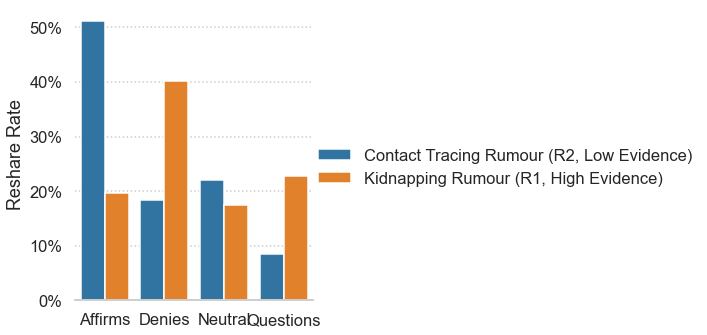

In [14]:
group_cols = ["rumour_label","code_label"]
# Get counts
reshare_rates = coded_tweets.groupby(group_cols)[['id']].count().rename({'id':'rate'},axis=1)
# convert to percentages
reshare_rates = reshare_rates.groupby(level=0).apply(lambda  x: x / float(x.sum())).reset_index()

from  matplotlib.ticker import PercentFormatter
g = sns.catplot(data=reshare_rates,
                kind="bar",
                x="code_label", 
                y="rate", 
                hue="rumour_label",
                ci="sd"
               )
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
g.despine(left=True)
g.set_axis_labels("", "Reshare Rate")
g.legend.set_title("")